<a href="https://colab.research.google.com/github/PoojaBadade122/Dibetes-/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Install Liabraries

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


### EDA - Exploratory data analysis

In [ ]:

import pandas as pd
df = pd.read_csv("processed_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,-0.000865,33.6,0.817604,1.355826,1
1,1,85.0,66.0,29.0,-0.000865,26.6,-0.148318,0.136825,0
2,8,183.0,64.0,29.0,-0.000865,23.3,0.927066,0.239735,1
3,1,89.0,66.0,23.0,-0.568394,28.1,-1.311750,-1.497328,0
4,0,137.0,40.0,35.0,0.602544,43.1,2.378094,0.335945,1


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.nunique()

,0
Pregnancies,17
Glucose,349
BloodPressure,239
SkinThickness,236
Insulin,352
BMI,477
DiabetesPedigreeFunction,749
Age,278
Outcome,2


####**Data** classification

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['Outcome']
Continuous Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


###DATA **visualization**

/tmp/ipython-input-1210160839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outcome'], palette="viridis")


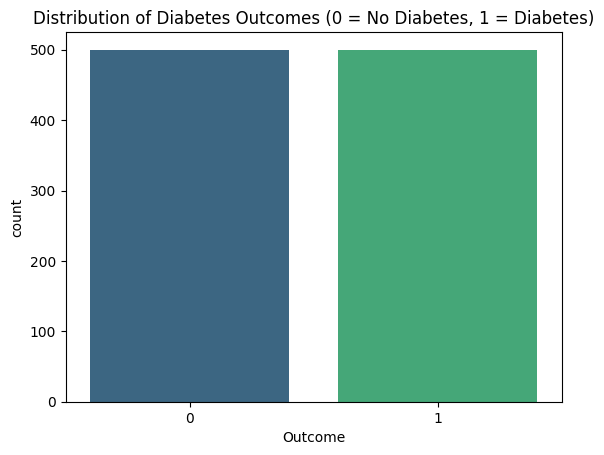

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Outcome'], palette="viridis")
plt.title("Distribution of Diabetes Outcomes (0 = No Diabetes, 1 = Diabetes)")
plt.show()


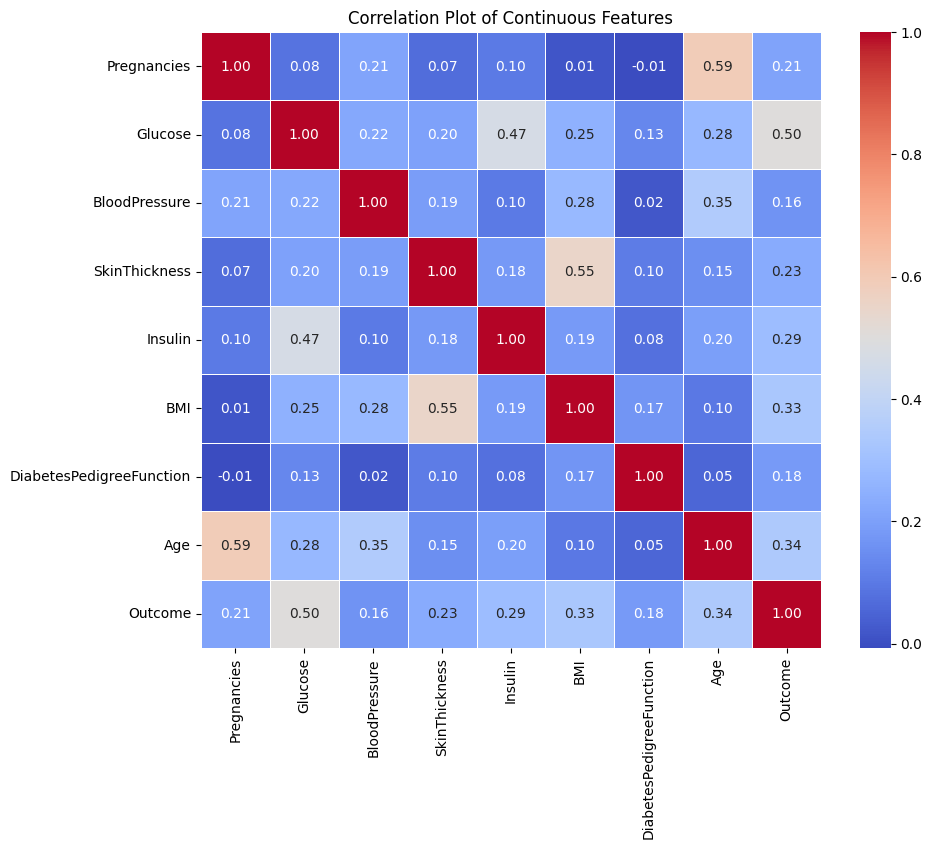

In [ ]:
corr_matrix = df[numerical_columns ].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()


#### Feature **Importance**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Split features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Get feature importances
feature_importances = dt_classifier.feature_importances_
feature_names = X.columns

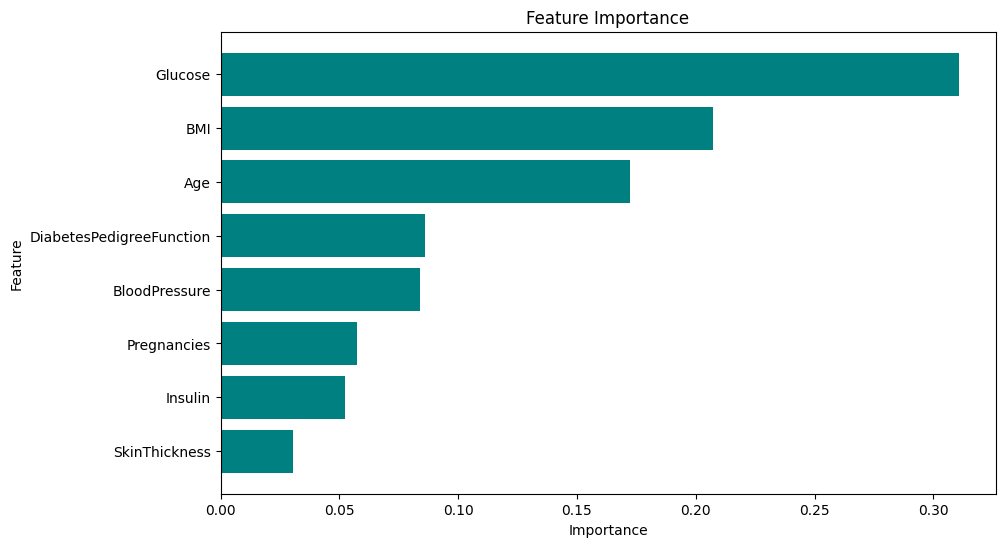

In [ ]:
# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

### Model Training

#### Moodel Preparation

In [ ]:
from sklearn.model_selection import train_test_split

# Define features & target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Training size: (800, 8), Testing size: (200, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling (fit on training data, transform both train & test)
X_scaled = scaler.fit_transform(X)  # X should be your features

# Convert back to DataFrame (optional, for better readability)
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Verify scaling
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.603857,0.703813,-0.070462,0.624316,-0.102220,0.081027,0.789334,1.296676
1,-0.894548,-1.329692,-0.584809,-0.080959,-0.102220,-0.976002,-0.201150,0.030782
2,1.203219,1.833537,-0.756258,-0.080959,-0.102220,-1.474316,0.901579,0.137651
3,-0.894548,-1.200580,-0.584809,-0.786234,-0.686384,-0.749496,-1.394166,-1.666236
4,-1.194229,0.348756,-2.813645,0.624316,0.518875,1.515567,2.389505,0.237562


#### All ML algothms in 1 shot

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

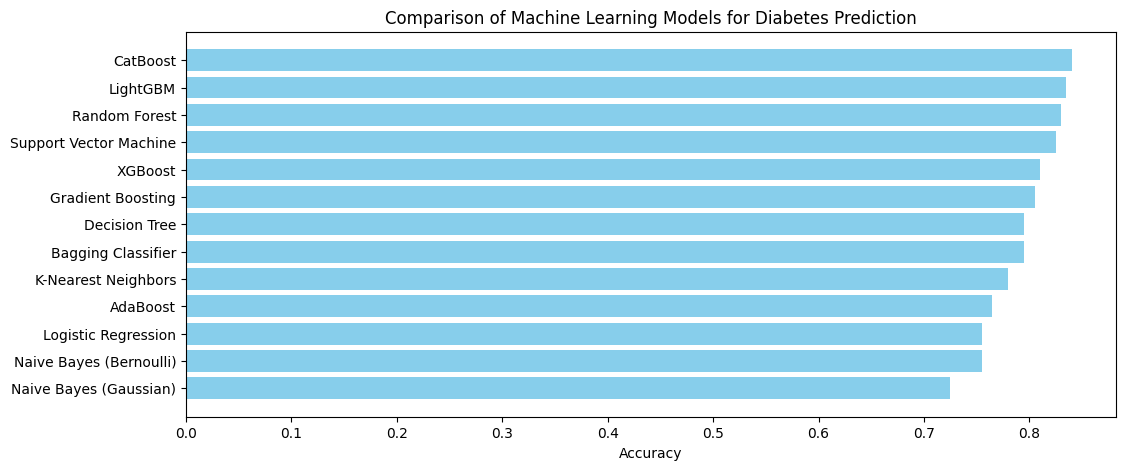

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv("/content/processed_diabetes.csv")  # Change path if needed
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Support Vector Machine": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)  # Sort by best accuracy
print(results_df)

# Plot accuracy of models
plt.figure(figsize=(12, 5))
plt.barh(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Comparison of Machine Learning Models for Diabetes Prediction")
plt.gca().invert_yaxis()
plt.show()


Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       100
           1       0.74      0.78      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



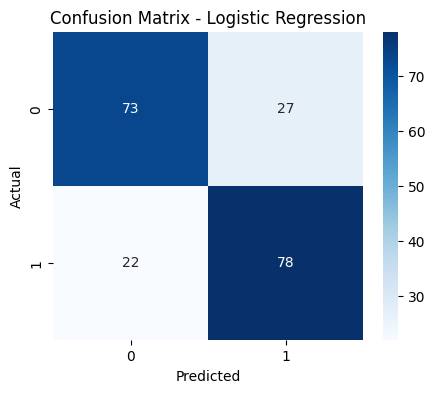


K-Nearest Neighbors Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       100
           1       0.76      0.81      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



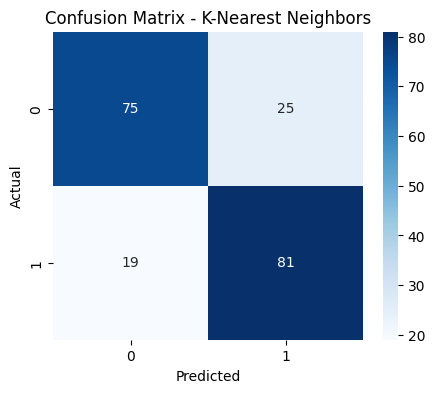


Naive Bayes (Gaussian) Model Performance:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       100
           1       0.71      0.76      0.73       100

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



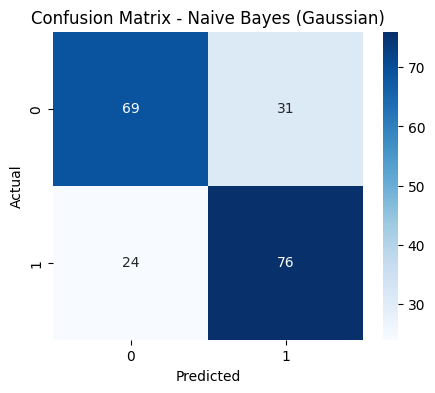


Naive Bayes (Bernoulli) Model Performance:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       100
           1       0.74      0.79      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



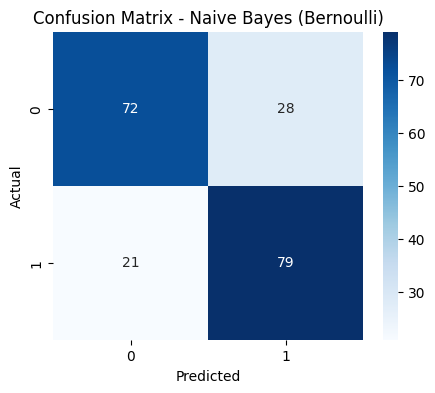


Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.78      0.82      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



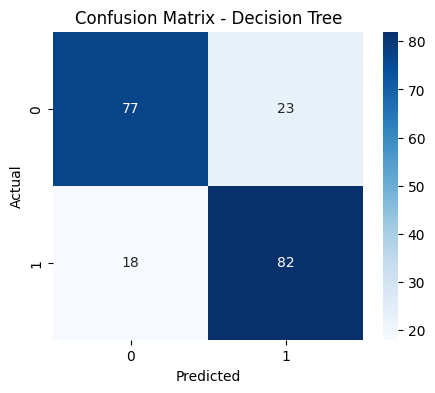


Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.80      0.88      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



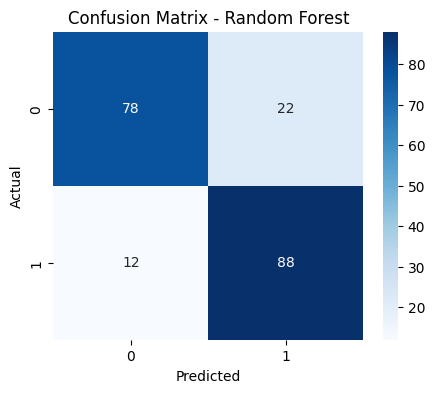


Gradient Boosting Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.84      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



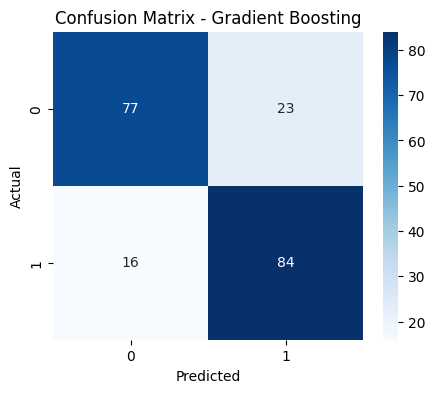


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.80      0.83      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



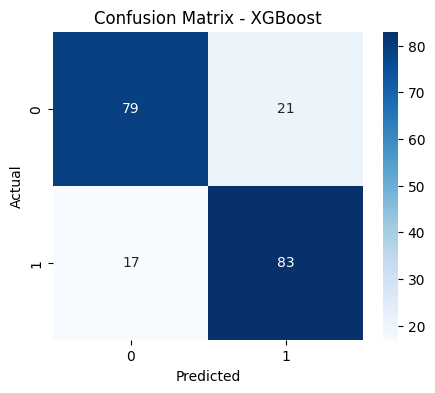

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM Model Performance:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       100
           1       0.82      0.86      0.84       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



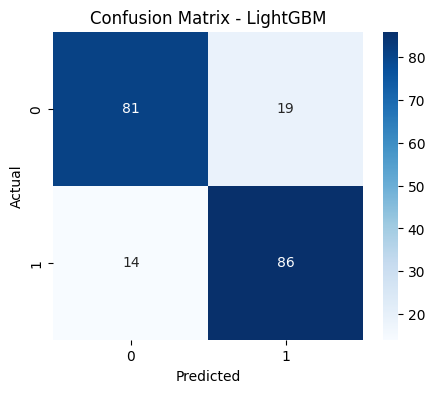


CatBoost Model Performance:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       100
           1       0.80      0.91      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



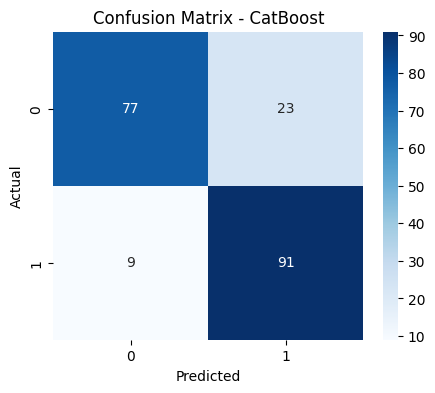


Support Vector Machine Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       100
           1       0.79      0.88      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



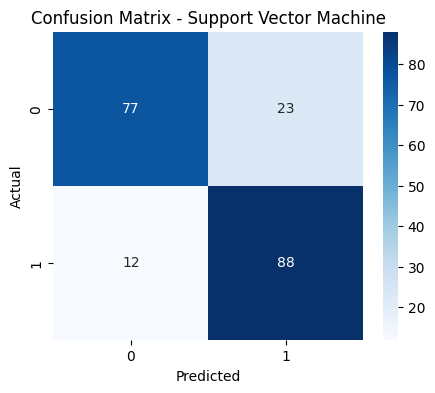


AdaBoost Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       100
           1       0.75      0.79      0.77       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



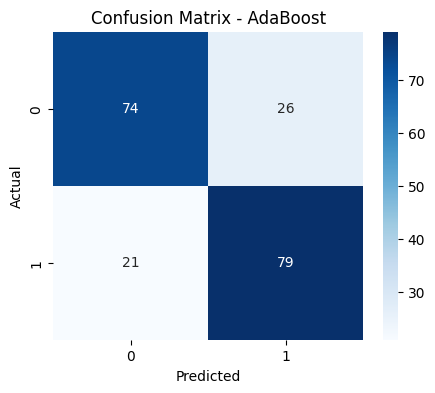


Bagging Classifier Model Performance:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.81      0.77      0.79       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



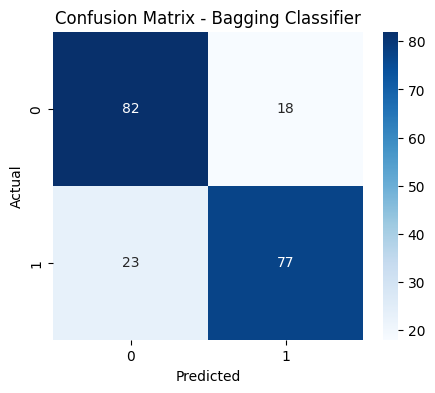


Summary of Model Performance:
           Logistic Regression  K-Nearest Neighbors  Naive Bayes (Gaussian)  \
Accuracy              0.755000             0.780000                 0.72500   
Precision             0.742857             0.764151                 0.71028   
Recall                0.780000             0.810000                 0.76000   
F1-Score              0.760976             0.786408                 0.73430   

           Naive Bayes (Bernoulli)  Decision Tree  Random Forest  \
Accuracy                  0.755000       0.795000       0.830000   
Precision                 0.738318       0.780952       0.800000   
Recall                    0.790000       0.820000       0.880000   
F1-Score                  0.763285       0.800000       0.838095   

           Gradient Boosting   XGBoost  LightGBM  CatBoost  \
Accuracy            0.805000  0.810000  0.835000  0.840000   
Precision           0.785047  0.798077  0.819048  0.798246   
Recall              0.840000  0.830000  0.8600

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store all metrics
metrics = {}

# Iterate over each trained model
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Save metrics
    metrics[name] = [accuracy, precision, recall, f1]

    # Print classification report
    print(f"\n{name} Model Performance:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Convert metrics dictionary to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1-Score"])

# Display all metrics
print("\nSummary of Model Performance:")
print(metrics_df)


ANN in the matrix

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (ANN performs better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape[1]

8

In [ ]:
# Define ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train ANN
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8231 - loss: 0.4076 - val_accuracy: 0.7950 - val_loss: 0.4454
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.4400 - val_accuracy: 0.8050 - val_loss: 0.4436
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8154 - loss: 0.4148 - val_accuracy: 0.8000 - val_loss: 0.4458
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8281 - loss: 0.4039 - val_accuracy: 0.7850 - val_loss: 0.4463
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8134 - loss: 0.4046 - val_accuracy: 0.7950 - val_loss: 0.4459
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8186 - loss: 0.4210 - val_accuracy: 0.8000 - val_loss: 0.4477
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8252 - loss: 0.4213 - val_accuracy: 0.7950 - val_loss: 0.4476
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.4120 - val_accuracy: 0.7950 - v

In [ ]:
# Evaluate performance
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ ANN Accuracy: {accuracy:.4f}")

print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🟦 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
✅ ANN Accuracy: 0.7950
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.69      0.77        99
           1       0.75      0.90      0.82       101

    accuracy                           0.80       200
   macro avg       0.81      0.79      0.79       200
weighted avg       0.81      0.80      0.79       200

🟦 Confusion Matrix:
 [[68 31]
 [10 91]]


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.6657 - loss: 0.6303 - val_accuracy: 0.5050 - val_loss: 3.4355
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7246 - loss: 0.5548 - val_accuracy: 0.5050 - val_loss: 2.4182
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7289 - loss: 0.5217 - val_accuracy: 0.5150 - val_loss: 1.7581
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7320 - loss: 0.5063 - val_accuracy: 0.5450 - val_loss: 1.1797
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.4771 - val_accuracy: 0.6100 - val_loss: 0.8917
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7699 - loss: 0.4671 - val_accuracy: 0.6800 - val_loss: 0.7765
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7715 - loss: 0.4736 - val_accuracy: 0.7150 - val_loss: 0.7074
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7830 - loss: 0.4773 - val_accuracy: 0.7350 - val_loss: 0.6157
Ep

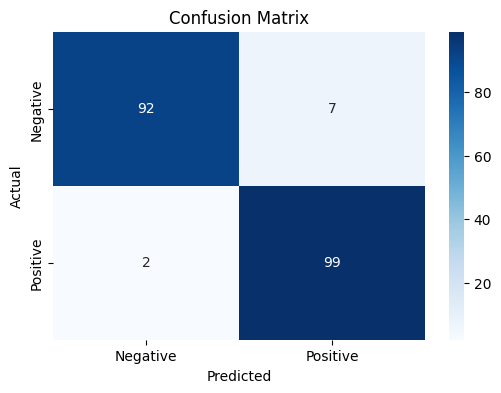

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Load your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Optimized ANN Model ---
ann = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer=AdamW(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# --- Optimized Random Forest ---
rf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=True, random_state=42)
rf.fit(X_train, y_train)

# --- Hybrid Model with XGBoost Meta-Learner ---
rf_preds = rf.predict_proba(X_test)[:, 1]
ann_preds = ann.predict(X_test).flatten()
hybrid_X = np.column_stack((rf_preds, ann_preds))

xgb_meta = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_meta.fit(hybrid_X, y_test)

final_preds = xgb_meta.predict(hybrid_X)

# --- Evaluate Model ---
accuracy = accuracy_score(y_test, final_preds)
print(f"🏆 Hybrid Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, final_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, final_preds)
print("\n🟦 Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save ANN model
ann.save("ann_model.h5")

# Save Random Forest model
joblib.dump(rf, "random_forest_model.pkl")

# Save XGBoost model
xgb_meta.save_model("xgb_meta_model.json")

print("✅ Models saved successfully!")



✅ Models saved successfully!


In [ ]:
from google.colab import files
import joblib

# Save models
ann.save("ann_model.h5")
joblib.dump(rf, "random_forest_model.pkl")
xgb_meta.save_model("xgb_meta_model.json")

print("✅ Models saved successfully!")

# Download models
files.download("ann_model.h5")
files.download("random_forest_model.pkl")
files.download("xgb_meta_model.json")


✅ Models saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>